Instalação de frameworks

In [1]:
! ls /

'ls' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [3]:
pip install tensorflow numpy matplotlib seaborn scikit-learn opencv-python opencv-python-headless


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 16.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 16.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 17.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 21.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 18.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 10.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 7.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


1. Configurações e Importação de Bibliotecas

Para iniciar, configure o ambiente para utilizar a GPU.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Verificar se a GPU está disponível
print("GPU available:", "Yes" if tf.config.list_physical_devices('GPU') else "No")


2024-11-12 14:23:02.323539: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-12 14:23:02.441719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731432182.488200     423 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731432182.501561     423 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 14:23:02.613330: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

GPU available: Yes


2. ETL (Extract, Transform, Load)

Carregar e Visualizar os Dados

    Carregar imagens das pastas "angry", "happy" e "neutral".
    Converter todas as imagens para preto e branco.
    Visualizar algumas amostras de cada classe para garantir que estão corretas.

In [3]:
# Caminhos para as pastas de emoções
emotion_classes = ["angry", "happy", "neutral"]
#dataset_path = "/mnt/c/Users/micae/OneDrive/Desktop/Reconhecimento_de_emoção/ETL/Dataset"
dataset_path = "/mnt/c/Users/micae/OneDrive/Desktop/Reconhecimento_de_emoção/ETL/Dataset"

# Função para carregar as imagens e converter para preto e branco
def load_images(dataset_path, classes):
    images = []
    labels = []
    for label, emotion in enumerate(classes):
        path = os.path.join(dataset_path, emotion)
        for file in os.listdir(path):
            img_path = os.path.join(path, file)
            img = load_img(img_path, color_mode="grayscale")  # Converter para P&B
            img = img_to_array(img)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Carregar e verificar algumas imagens
images, labels = load_images(dataset_path, emotion_classes)


FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: '/mnt/c/Users/micae/OneDrive/Desktop/Reconhecimento_de_emoção/ETL/Dataset\\angry'

## Verificar o Tamanho das Imagens Carregadas

Adicione um pequeno trecho de código para exibir as dimensões das imagens após carregá-las:

In [13]:
# Carregar e verificar o tamanho das imagens
images, labels = load_images(dataset_path, emotion_classes)

# Exibir as dimensões das primeiras imagens
for i in range(5):  # Exibir as dimensões das primeiras 5 imagens
    print(f"Imagem {i+1} - Dimensões: {images[i].shape}")

Imagem 1 - Dimensões: (48, 48, 1)
Imagem 2 - Dimensões: (48, 48, 1)
Imagem 3 - Dimensões: (48, 48, 1)
Imagem 4 - Dimensões: (48, 48, 1)
Imagem 5 - Dimensões: (48, 48, 1)


2. Verificar Se Todas as Imagens Têm o Mesmo Tamanho

Para garantir que todas as imagens têm o mesmo tamanho, você pode fazer uma verificação de consistência:

In [15]:
# Verificar a consistência de tamanho das imagens
unique_sizes = set(img.shape for img in images)
print(f"Tamanhos únicos das imagens: {unique_sizes}")


Tamanhos únicos das imagens: {(48, 48, 1)}


Visualizar Exemplos de Imagens

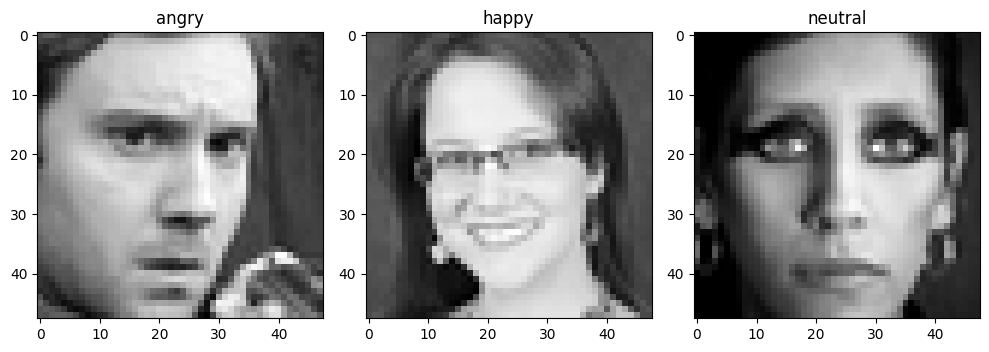

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    img_idx = np.where(labels == i)[0][0]
    ax.imshow(images[img_idx].squeeze(), cmap='gray')
    ax.set_title(emotion_classes[i])
plt.tight_layout()
plt.show()


Exibir Distribuição das Classes

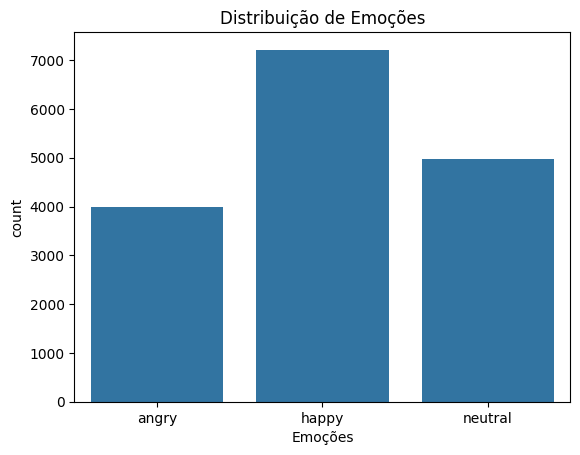

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapeamento dos rótulos numéricos para os nomes das classes
emotion_map = {0: "angry", 1: "happy", 2: "neutral"}
emotion_labels = [emotion_map[label] for label in labels]

# Plotar a distribuição das emoções usando os nomes das classes
sns.countplot(x=emotion_labels)
plt.title("Distribuição de Emoções")
plt.xlabel("Emoções")
plt.show()


## 3. Preprocessamento e Divisão do Dataset

    Balanceamento Inicial: Selecionamos a mesma quantidade de amostras para cada classe, baseada na classe com menor número de amostras. Esses dados balanceados serão divididos entre treino e teste.
    Divisão dos Dados Balanceados: Usamos 90% das imagens balanceadas para treino e 10% para teste.
    Adição do Excedente no Conjunto de Teste: Qualquer dado excedente que foi cortado durante o balanceamento será adicionado ao conjunto de teste.
    Configuração da Semente Aleatória: Adicione um valor de semente (random_state) para reproduzir as divisões aleatórias.
    Separar fisicamente as imagens em pastas: Crie diretórios para treino, validação e teste e salve as imagens correspondentes em cada pasta.

In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import array_to_img

# Definir a semente para garantir reprodutibilidade
random_seed = 42

# Identificar o número mínimo de amostras entre as classes para balanceamento
unique, counts = np.unique(labels, return_counts=True)
class_counts = dict(zip(unique, counts))
min_class_count = min(class_counts.values())  # Número mínimo de amostras entre as classes

# 1. Balancear o conjunto de dados selecionando o número mínimo de amostras de cada classe
X_balanced = []
y_balanced = []
X_excess = []
y_excess = []

for class_label in unique:
    # Seleciona todas as imagens e rótulos da classe atual
    class_images = images[labels == class_label]
    class_labels = labels[labels == class_label]
    
    # Calcula o tamanho do conjunto de excesso
    excess_size = len(class_images) - min_class_count
    
    # Verifica se há dados excedentes, caso contrário, coloca tudo em balanced
    if excess_size > 0:
        # Divide entre balanceado e excedente usando test_size
        X_class_balanced, X_class_excess, y_class_balanced, y_class_excess = train_test_split(
            class_images, class_labels, test_size=excess_size / len(class_images), random_state=random_seed
        )
        
        # Adiciona ao conjunto de excesso
        X_excess.extend(X_class_excess)
        y_excess.extend(y_class_excess)
    else:
        # Se não houver excesso, coloca tudo em balanced
        X_class_balanced, y_class_balanced = class_images, class_labels
    
    # Adiciona ao conjunto balanceado
    X_balanced.extend(X_class_balanced)
    y_balanced.extend(y_class_balanced)

# Converte listas para arrays numpy
X_balanced = np.array(X_balanced)
y_balanced = np.array(y_balanced)
X_excess = np.array(X_excess)
y_excess = np.array(y_excess)

# 2. Dividir o conjunto balanceado em 90% para treino e 10% para teste balanceado
X_train, X_test_balanced, y_train, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.1, stratify=y_balanced, random_state=random_seed
)

# 3. Combinar os dados excedentes com o conjunto de teste para formar o conjunto completo de teste
X_test = np.concatenate((X_test_balanced, X_excess))
y_test = np.concatenate((y_test_balanced, y_excess))

print(f"Tamanho treino: {len(X_train)}, Tamanho teste: {len(X_test)}")

# Criação das pastas para salvar treino e teste
output_dirs = {
    "train": "/mnt/c/Users/micae/OneDrive/Desktop/Reconhecimento_de_emoção/ETL/Dataset/train",
    "test": "/mnt/c/Users/micae/OneDrive/Desktop/Reconhecimento_de_emoção/ETL/Dataset/test"
}

# Limpar e recriar pastas
for path in output_dirs.values():
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path, exist_ok=True)

# Função para salvar as imagens nas pastas de treino e teste
def save_images_to_folder(images, labels, folder):
    for i, img in enumerate(images):
        label_folder = os.path.join(folder, emotion_classes[labels[i]])  # Usa o nome da emoção como subpasta
        os.makedirs(label_folder, exist_ok=True)
        img_path = os.path.join(label_folder, f"img_{i}.png")
        
        # Multiplicar por 255 e converter para uint8 se necessário
        if img.max() <= 1.0:  # Se os valores estiverem entre 0 e 1, converta para 0-255
            img = (img * 255).astype("uint8")
        
        # Salvar a imagem corretamente em escala de cinza
        img_pil = array_to_img(img)
        img_pil.save(img_path)

# Salvar as imagens nas pastas específicas para treino e teste
save_images_to_folder(X_train, y_train, output_dirs["train"])
save_images_to_folder(X_test, y_test, output_dirs["test"])





Tamanho treino: 10786, Tamanho teste: 5389


## Ler e plotar o histograma das classes no dataset de treinamento e teste

A parte de cima ainda está configurada para o pc do lab. vou continuar a partir daqui. 

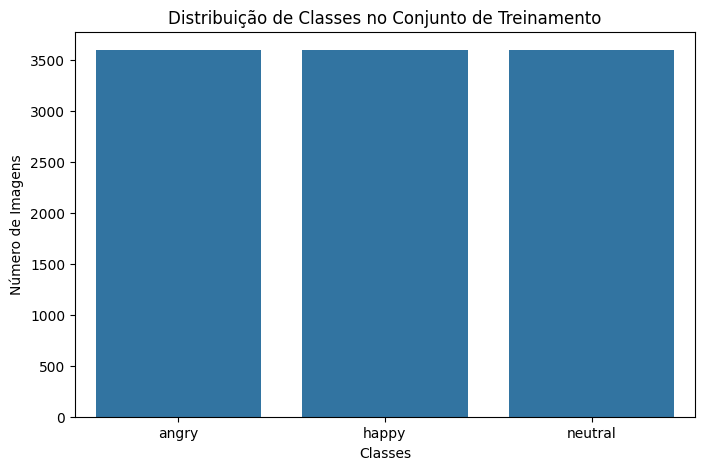

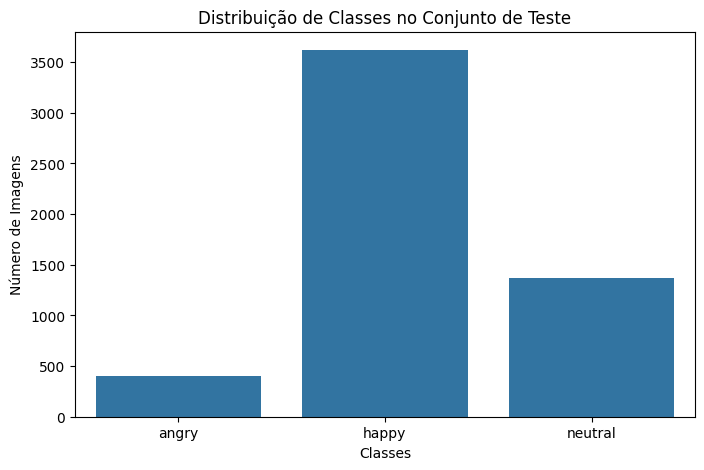

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Caminho para o dataset de treino e teste
train_path = r"C:\Users\LAMII\Desktop\Classificação de emoção\ETL\Dataset\train"
test_path = r"C:\Users\LAMII\Desktop\Classificação de emoção\ETL\Dataset\test"

# Função para contar o número de imagens por classe
def count_images_per_class(path):
    class_counts = {}
    for class_name in os.listdir(path):
        class_folder = os.path.join(path, class_name)
        if os.path.isdir(class_folder):
            class_counts[class_name] = len(os.listdir(class_folder))
    return class_counts

# Contar as imagens no conjunto de treino e teste
train_counts = count_images_per_class(train_path)
test_counts = count_images_per_class(test_path)

# Plotar o histograma para o conjunto de treino
plt.figure(figsize=(8, 5))
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title("Distribuição de Classes no Conjunto de Treinamento")
plt.xlabel("Classes")
plt.ylabel("Número de Imagens")
plt.show()

# Plotar o histograma para o conjunto de teste
plt.figure(figsize=(8, 5))
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()))
plt.title("Distribuição de Classes no Conjunto de Teste")
plt.xlabel("Classes")
plt.ylabel("Número de Imagens")
plt.show()

## Data augumentation no dataset de treinamento.
- Configuração de ImageDataGenerator: Definimos várias operações de data augmentation, como rotação, deslocamento, cisalhamento, zoom e espelhamento horizontal.

- Selecionar 30% das Imagens: Carregamos todas as imagens do conjunto de treinamento e escolhemos aleatoriamente 30% delas para aplicar data augmentation.
- Criar uma nova pasta que contém tanto o dataset de treinamento original quanto os dados aumentados.
- Salvar as imagens originais e aumentadas na nova pasta, organizadas por classe.

- Visualização Didática: Escolhemos uma imagem do conjunto selecionado e aplicamos as transformações de data augmentation. As variações geradas são exibidas em uma grade de 2x3, mostrando diferentes transformações.

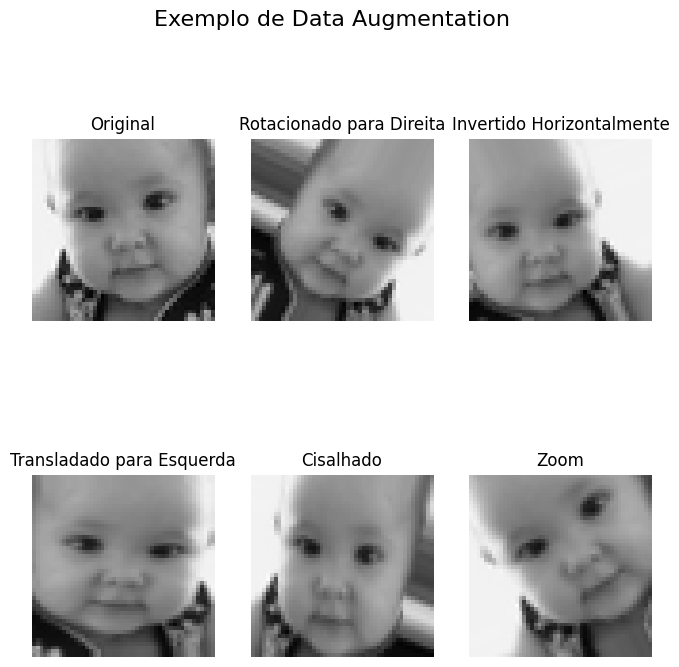

In [12]:
# Mudar esse trecho pra ficar só a parte de exemplo com uma imagem aleatéria. Não selecionar 30% das imagens.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.utils import img_to_array, load_img

# Configuração do Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=30,     # Rotação aleatória em 30 graus
    width_shift_range=0.1, # Deslocamento horizontal de até 10%
    height_shift_range=0.1,# Deslocamento vertical de até 10%
    shear_range=0.2,       # Cisalhamento
    zoom_range=0.2,        # Zoom
    horizontal_flip=True,  # Espelhamento horizontal
    fill_mode="nearest"    # Preenchimento dos espaços após transformação
)

# Caminho para o conjunto de treinamento
train_path = r"C:\Users\LAMII\Desktop\Classificação de emoção\ETL\Dataset\train"

# Selecionar 30% das imagens do conjunto de treinamento
all_images = []
for class_name in os.listdir(train_path):
    class_folder = os.path.join(train_path, class_name)
    if os.path.isdir(class_folder):
        images_in_class = [os.path.join(class_folder, img) for img in os.listdir(class_folder)]
        all_images.extend(images_in_class)

num_augmentation = int(0.3 * len(all_images))
selected_images = random.sample(all_images, num_augmentation)

# Exemplo de Data Augmentation em uma imagem
example_image_path = selected_images[0]  # Escolhe uma imagem para exibir
img = load_img(example_image_path)       # Carrega a imagem
img_array = img_to_array(img)             # Converte para array
img_array = np.expand_dims(img_array, 0)  # Adiciona uma dimensão para o gerador

# Visualizar as transformações aplicadas com legendas
transformations = ["Original", "Rotacionado para Direita", "Invertido Horizontalmente", 
                   "Transladado para Esquerda", "Cisalhado", "Zoom"]

plt.figure(figsize=(8, 8))  # Define o tamanho da figura para 8x8
plt.suptitle("Exemplo de Data Augmentation", fontsize=16)

# Plotar a imagem original primeiro
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.axis("off")
plt.title(transformations[0])

# Gerar e plotar imagens aumentadas
for i, batch in enumerate(data_gen.flow(img_array, batch_size=1)):
    if i >= 5:  # Mostrar 5 exemplos de augmentations (junto com a imagem original)
        break
    plt.subplot(2, 3, i + 2)
    augmented_image = batch[0].astype("uint8")  # Converte para uint8 para exibição
    plt.imshow(augmented_image)
    plt.axis("off")
    plt.title(transformations[i + 1])

plt.show()



In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.utils import img_to_array, load_img, array_to_img
import shutil

# Configuração do Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=30,     
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Caminho para o conjunto de treinamento original e o novo conjunto
train_path = r"C:\Users\LAMII\Desktop\Classificação de emoção\ETL\Dataset\train"
output_path = r"C:\Users\LAMII\Desktop\Classificação de emoção\ETL\Dataset\treinamento_2"

# Limpar a pasta de saída se já existir e recriá-la
if os.path.exists(output_path):
    shutil.rmtree(output_path)
os.makedirs(output_path, exist_ok=True)

# Selecionar 30% das imagens do conjunto de treinamento para data augmentation
all_images = []
for class_name in os.listdir(train_path):
    class_folder = os.path.join(train_path, class_name)
    if os.path.isdir(class_folder):
        images_in_class = [os.path.join(class_folder, img) for img in os.listdir(class_folder)]
        all_images.extend(images_in_class)

num_augmentation = int(0.3 * len(all_images))
selected_images = random.sample(all_images, num_augmentation)

# Função para salvar imagens em uma pasta específica
def save_image(img_array, folder, img_name):
    os.makedirs(folder, exist_ok=True)
    img_path = os.path.join(folder, img_name)
    img = array_to_img(img_array)
    img.save(img_path)

# Copiar todas as imagens originais para a nova pasta "treinamento_2"
for class_name in os.listdir(train_path):
    class_folder = os.path.join(train_path, class_name)
    output_class_folder = os.path.join(output_path, class_name)
    os.makedirs(output_class_folder, exist_ok=True)  # Garantir que a subpasta de classe exista
    
    if os.path.isdir(class_folder):
        images_in_class = os.listdir(class_folder)
        
        # Copiar todas as imagens originais
        for img_name in images_in_class:
            img_path = os.path.join(class_folder, img_name)
            shutil.copy(img_path, os.path.join(output_class_folder, img_name))

# Aplicar data augmentation nas imagens selecionadas e salvar na nova pasta
for img_path in selected_images:
    # Carrega a imagem e a converte para um array
    img = load_img(img_path)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, 0)  # Adiciona uma dimensão para o gerador
    
    # Identifica a classe da imagem e define o diretório de saída
    class_name = os.path.basename(os.path.dirname(img_path))
    output_class_folder = os.path.join(output_path, class_name)
    
    # Gerar e salvar uma imagem aumentada para cada imagem selecionada
    for i, batch in enumerate(data_gen.flow(img_array, batch_size=1)):
        augmented_img = batch[0].astype("uint8")
        save_image(augmented_img, output_class_folder, f"aug_{i}_{os.path.basename(img_path)}")
        break  # Apenas uma imagem aumentada por original

print("Dataset de treinamento com data augmentation salvo em 'treinamento_2'")


Dataset de treinamento com data augmentation salvo em 'treinamento_2'


## Plot das classes de treinamento pós data augmentation

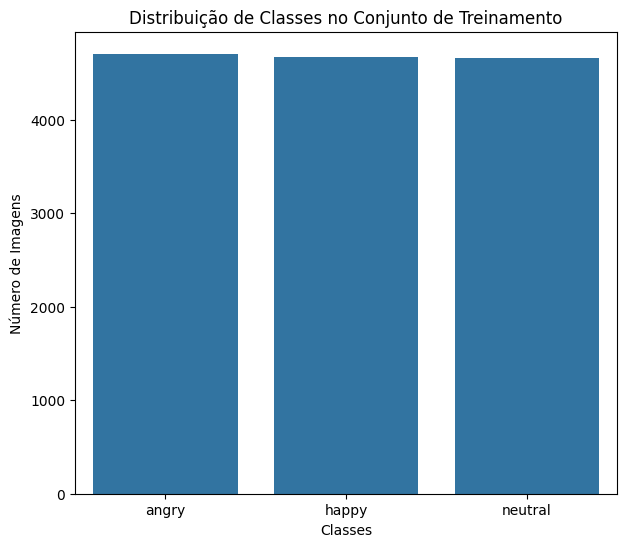

In [16]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho para o novo conjunto de treinamento
train_path = r"C:\Users\LAMII\Desktop\Classificação de emoção\ETL\Dataset\treinamento_2"

# Função para contar o número de imagens por classe
def count_images_per_class(path):
    class_counts = {}
    for class_name in os.listdir(path):
        class_folder = os.path.join(path, class_name)
        if os.path.isdir(class_folder):
            class_counts[class_name] = len(os.listdir(class_folder))
    return class_counts

# Contar as imagens no conjunto de treinamento
train_counts = count_images_per_class(train_path)

# Plotar o histograma da distribuição das classes
plt.figure(figsize=(7, 6))
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title("Distribuição de Classes no Conjunto de Treinamento")
plt.xlabel("Classes")
plt.ylabel("Número de Imagens")
plt.show()
